In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from torch import cuda
device = 'cuda'

In [4]:
np.set_printoptions(suppress=True)
torch.cuda.is_available()

True

In [5]:
# df = pd.read_excel('.//Data//Depression_dataset_preprocessed.xlsx', sheet_name='20001_rows_depression_texts')
df = pd.read_excel('.//Data//20001_rows_depression_text.xlsx')

sheet_names =   
  
['98_row_Mental_Health_FAQs',  
 'Counsellor_Chats',  
 'Text_classifications',  
 '99_rows_Human_&_Therapist',  
 '20001_rows_depression_texts',  
 'Reddit_Posts']  

In [6]:
df.dropna(inplace=True) # I think theres one row

In [7]:
df.head()

,text,class
0,dont make super edgy jokes around or to a sens...,nondepression
1,anyone need a friend this is a tough time for ...,nondepression
2,the big problem with the not like other girls ...,nondepression
3,thankyou godfor bringing me into existence jus...,depression
4,so you know the saying im in a pickle well tod...,nondepression


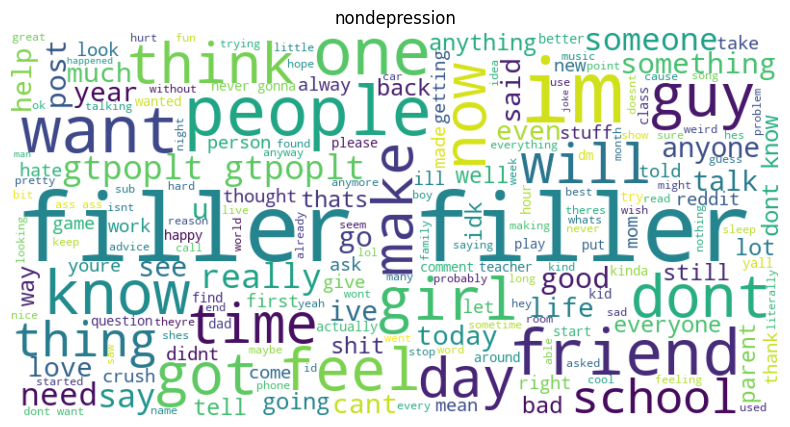

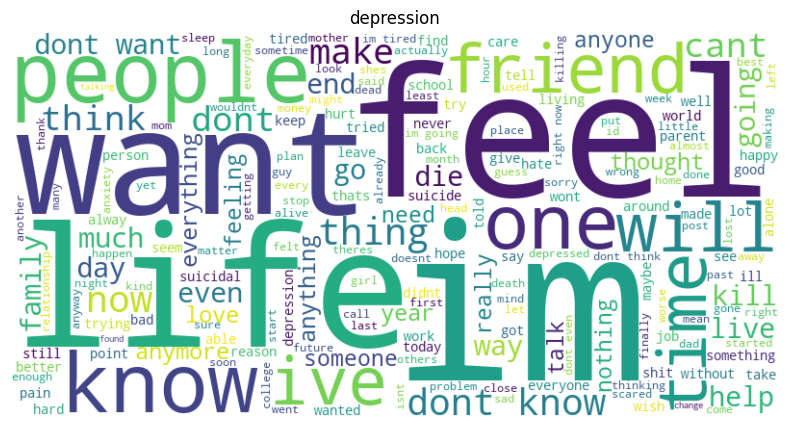

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for cat in df['class'].unique():
    conversation_text = ' '.join(df[df['class'] == cat]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(conversation_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(cat)
    plt.show()

In [9]:
df['class_binary'] = df['class'].astype('category').cat.codes
df['class'].value_counts()

class
nondepression    8539
depression       7575
Name: count, dtype: int64

In [10]:
# Docs referenced :- https://huggingface.co/docs/transformers/model_doc/distilbert#usage-tips

from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased") # 12 layers

# https://discuss.huggingface.co/t/difference-betweeen-distilberttokenizerfast-and-distilberttokenizer/5961
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
# https://towardsdatascience.com/hugging-face-transformers-fine-tuning-distilbert-for-binary-classification-tasks-490f1d192379
# Make DistilBERT layers untrainable

# for layer in model.layers:
#    layer.trainable = False

In [12]:
sample_data = ['test tokenizer']
tokenizer(sample_data, padding=True, truncation=True, max_length=512)

{'input_ids': [[101, 3231, 19204, 17629, 102]], 'attention_mask': [[1, 1, 1, 1, 1]]}

In [13]:
X = list(df['text'])
y = list(df['class_binary'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

In [14]:
X_train_tokenized.keys()

dict_keys(['input_ids', 'attention_mask'])

In [15]:
print(X_train_tokenized['attention_mask'][0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [16]:
len(X_train),len(X_val)

(12891, 3223)

In [17]:
# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [18]:
train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)

In [19]:
def compute_metrics(p):
    print(type(p))
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [20]:
# Define Trainer & Hyper Params
# Transformers -> Trainer & TrainingArguments docs:- https://huggingface.co/docs/transformers/main_classes/trainer
# Reccomendation on Hyper Parameters :- https://wandb.ai/jack-morris/david-vs-goliath/reports/Does-Model-Size-Matter-A-Comparison-of-BERT-and-DistilBERT--VmlldzoxMDUxNzU

args = TrainingArguments(
    output_dir="output",
    num_train_epochs=4,
    per_device_train_batch_size=16,
    learning_rate=3e-5,
    resume_from_checkpoint=True,
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

In [21]:
torch.cuda.is_available()

True

In [24]:
trainer.train()

  0%|          | 0/3224 [00:00<?, ?it/s]

 16%|█▌        | 500/3224 [16:21<1:28:39,  1.95s/it]Checkpoint destination directory output\checkpoint-500 already exists and is non-empty. Saving will proceed but saved results may be invalid.


{'loss': 0.167, 'grad_norm': 0.6544538140296936, 'learning_rate': 2.534739454094293e-05, 'epoch': 0.62}


 31%|███       | 1000/3224 [32:43<1:12:31,  1.96s/it]Checkpoint destination directory output\checkpoint-1000 already exists and is non-empty. Saving will proceed but saved results may be invalid.


{'loss': 0.0875, 'grad_norm': 0.2727217674255371, 'learning_rate': 2.0694789081885857e-05, 'epoch': 1.24}


 47%|████▋     | 1500/3224 [49:05<55:42,  1.94s/it]  Checkpoint destination directory output\checkpoint-1500 already exists and is non-empty. Saving will proceed but saved results may be invalid.


{'loss': 0.0547, 'grad_norm': 8.61336898803711, 'learning_rate': 1.6042183622828785e-05, 'epoch': 1.86}


 62%|██████▏   | 2000/3224 [1:05:25<39:48,  1.95s/it]Checkpoint destination directory output\checkpoint-2000 already exists and is non-empty. Saving will proceed but saved results may be invalid.


{'loss': 0.0263, 'grad_norm': 0.04135682061314583, 'learning_rate': 1.1389578163771711e-05, 'epoch': 2.48}


 78%|███████▊  | 2500/3224 [1:21:41<23:53,  1.98s/it]Checkpoint destination directory output\checkpoint-2500 already exists and is non-empty. Saving will proceed but saved results may be invalid.


{'loss': 0.0163, 'grad_norm': 0.0057863048277795315, 'learning_rate': 6.736972704714641e-06, 'epoch': 3.1}


 93%|█████████▎| 3000/3224 [1:39:18<07:47,  2.09s/it]Checkpoint destination directory output\checkpoint-3000 already exists and is non-empty. Saving will proceed but saved results may be invalid.


{'loss': 0.008, 'grad_norm': 0.01059497706592083, 'learning_rate': 2.0843672456575686e-06, 'epoch': 3.72}


100%|██████████| 3224/3224 [1:47:10<00:00,  1.99s/it]

{'train_runtime': 6430.5324, 'train_samples_per_second': 8.019, 'train_steps_per_second': 0.501, 'train_loss': 0.056088995900254686, 'epoch': 4.0}


TrainOutput(global_step=3224, training_loss=0.056088995900254686, metrics={'train_runtime': 6430.5324, 'train_samples_per_second': 8.019, 'train_steps_per_second': 0.501, 'train_loss': 0.056088995900254686, 'epoch': 4.0})

In [25]:
trainer.evaluate()

100%|██████████| 403/403 [01:48<00:00,  3.72it/s]

<class 'transformers.trainer_utils.EvalPrediction'>


{'eval_loss': 0.14437270164489746,
 'eval_accuracy': 0.9739373254731617,
 'eval_precision': 0.9765258215962441,
 'eval_recall': 0.9742388758782201,
 'eval_f1': 0.9753810082063306,
 'eval_runtime': 108.6297,
 'eval_samples_per_second': 29.67,
 'eval_steps_per_second': 3.71,
 'epoch': 4.0}

In [26]:
trainer.save_model('distil-bert_finetuned_on_20001_depressed_data_set_[4_epoch, 16_batch_size, 3e-5_LR]') 

In [ ]:
from transformers import DistilBertForSequenceClassification
model = DistilBertForSequenceClassification.from_pretrained('distil-bert_finetuned_on_20001_depressed_data_set_[4_epoch, 16_batch size, 3e-5_LR]')

# Move the model to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

In [25]:
# 1 = non-depressed
# 0 = depressed

# Realistic summarized text for a Depressed Person & Non-depressed person
# Generated using GPT 3.5 turbo : https://chat.openai.com/share/14c8efc4-4ecd-4765-852e-8948d12a4f1e

# A Happy Person
user_input = "I'm doing really well, thank you for asking! Life feels like a wonderful adventure filled with endless possibilities. I wake up every morning excited about what the day holds. I have a strong support system of friends and family who lift me up and bring joy to my life. I feel fulfilled in my work and hobbies, constantly learning and growing. Sure, there are challenges along the way, but I see them as opportunities for growth rather than obstacles. I make sure to take care of my mental and physical health, prioritizing self-care and mindfulness. Overall, I feel grateful for all the blessings in my life and look forward to each new day with optimism and enthusiasm."
# A Not-so happy person
# user_input = "I've been feeling incredibly overwhelmed lately. It's like this constant weight on my chest that I just can't shake off. I struggle to find joy in anything anymore, even the things I used to love. Simple tasks feel impossible, and I find myself withdrawing from friends and family because I don't want to burden them with my sadness. It's like I'm trapped in a dark tunnel with no light at the end. I feel hopeless, worthless, and like I'm just going through the motions of life without any real purpose. Every day is a struggle to get out of bed, and even when I do, I'm plagued by a sense of emptiness and despair. I know I need help, but even reaching out feels like too much effort. I just want the pain to stop."


inputs = tokenizer(user_input,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model(**inputs)
# print(outputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
# print(predictions) # prints tensor format
predictions = predictions.cpu().detach().numpy()
predictions

array([[0.000858  , 0.99914193]], dtype=float32)

In [29]:
predictions[0][1]

0.99914193

In [ ]:
# To-Do
# Figure out how to use TensorBoard & Log important metrics
# Follow Along : https://kuanhoong.medium.com/how-to-use-tensorboard-with-pytorch-e2b84aa55e67

def log_running_loss(loss, step, writer):
    writer.add_scalar('Running Loss', loss, step)

writer = SummaryWriter()

# HyperParams
EPOCHS = 5
BATCH_SIZE = 16

# Training loop
for epoch in range(EPOCHS):
    running_loss = 0

    for step, batch in enumerate(train_dataloader):
        # Train model
        outputs = trainer.model(**batch)
        loss = outputs.loss
        loss.backward()

        # Update running loss
        running_loss += loss.item()

        # Log running loss to TensorBoard
        log_running_loss(running_loss, step, writer)

        # Perform optimization step
        optimizer.step()
        optimizer.zero_grad()

    # Evaluate model at the end of each epoch
    trainer.evaluate()

writer.close()